In [4]:
%matplotlib inline
import gym
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T  

In [49]:

import numpy as np
import gym
import random
import time
from IPython.display import clear_output

env=gym.make("FrozenLake-v0")

action_space_size=env.action_space.n
state_space_size=env.observation_space.n

q_table=np.zeros((state_space_size,action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [50]:
num_episodes=10000
max_steps_per_episode=100
learning_rate=0.1
discount_rate=0.1
discount_rate=0.99
exploration_rate=1
max_exploration_rate=1
min_exploration_rate=0.01
exploration_decay_rate=0.01

rewards_all_episodes=[]
#Q-learning algorithm
for episode in range(num_episodes):
  state=env.reset()
  done=False
  rewards_current_episode=0
  for step in range(max_steps_per_episode):
    #exploration-exploitation trade-off
    exploration_rate_threshold=random.uniform(0,1)
    if exploration_rate_threshold > exploration_rate:
      action=np.argmax(q_table[state,:])
    else:

      action=env.action_space.sample()

      new_state,reward,done,info=env.step(action)

        #update Q-table for Q(s,a)
  q_table[state,action]=q_table[state,action]*(1-learning_rate) + \
    learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
     
  state=new_state
  rewards_current_episode += rewards_current_episode
  if done == True:
        break
        #Exploration rate decay
        exploration_rate=min_exploration_rate+ \
        (max_exploration_rate-min_exploration_rate)* np.exp(-exploration_decay_rate*episodes)
        rewards_all_episodes.append(rewards_current_episode)
        #calculate and print tthe average reward per thousand episodes
        rewards_per_thousand_episodes=np.split(np.array(rewards_all_episodes),num_episodes/1000)
        count=1000
        print("avg reward per thousand episodes")
        for r in rewards_per_thousand_episodes:
          print(count,":",str(sum(r/1000)))
          count += 1000
          print ('q_table')
          print(q_table)

for episode in range(3):
  state=env.reset()
  done=False
  print("episode",episode+1,"\n\n\n")
  time.sleep(1)
  for step in range(max_steps_per_episode):
    clear_output(wait=True)
    env.render()
    time.sleep(0.3)
    action=np.argmax(q_table[state,:])
    new_state,reward,done,info=env.step(action)
    if done:
      clear_output(wait=True)
      env.render()
      if reward == 1:
        print('goal')
        time.sleep(3)
      else:
   
          print('hole')
          time.sleep(3)
          clear_output(wait=True)
          break
          state=new_state
          env.close()

  (Left)
SFFF
FHFH
FFFH
HFFG
hole


In [47]:
def get_moving_average(period, values):
    values = torch.tensor(values, dtype=torch.float)
    if len(values) >= period:
        moving_avg = values.unfold(dimension=0, size=period, step=1) \
            .mean(dim=1).flatten(start_dim=0)
        moving_avg = torch.cat((torch.zeros(period-1), moving_avg))
        return moving_avg.numpy()
    else:
        moving_avg = torch.zeros(len(values))
        return moving_avg.numpy()

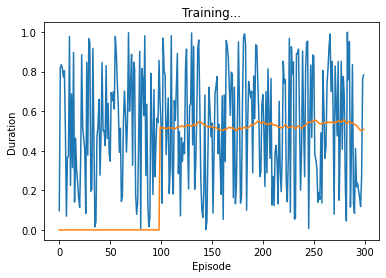

In [48]:
plot(np.random.rand(300), 100)